In [1]:
#sklearn and matplotlib  

from sklearn.svm import SVC 
from sklearn.cluster import SpectralClustering 
from sklearn.metrics import normalized_mutual_info_score 
from sklearn.decomposition import KernelPCA 
from sklearn.linear_model import LogisticRegression 
from sklearn import datasets 
from sklearn.decomposition import PCA 
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
%pip install numpy pandas matplotlib  

 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
 
%pip install -U scikit-learn 

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 
from sklearn import metrics 
from sklearn.metrics import normalized_mutual_info_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix 
from sklearn.linear_model import LogisticRegression 
from sklearn import datasets 
from sklearn.datasets import load_breast_cancer 

%pip install qiskit 

from qiskit.circuit import QuantumCircuit, ParameterVector, Parameter  
from qiskit.circuit.library import RealAmplitudes, EfficientSU2 
from qiskit.primitives import StatevectorSampler as Sampler 
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap, ZFeatureMap, TwoLocal, QuantumVolume 

%pip install qiskit-machine-learning 

from qiskit_machine_learning.utils import algorithm_globals 
from qiskit_machine_learning.kernels import FidelityStatevectorKernel #For simulation 
from qiskit_machine_learning.algorithms import QSVC 
from qiskit_machine_learning.algorithms.classifiers import VQC 
from qiskit_machine_learning.optimizers import COBYLA 

%pip install pylatexenc 

import seaborn as sns 
from IPython.display import clear_output 
import time 
import kagglehub 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Download latest version 

import os  
path = kagglehub.dataset_download("jakeshbohaju/brain-tumor") 

print("Path to dataset files:", path) 
print("\nFiles in the dataset:") 

for root, dirs, files in os.walk(path): 
    for file in files: 
        print(f"File: {file}") 
        print(f"Full path: {os.path.join(root, file)}") 
        print() 


import pandas as pd  

# Download dataset 

path = kagglehub.dataset_download("jakeshbohaju/brain-tumor") 

# Load the data using the correct filename 

data = pd.read_csv(path + "/Brain Tumor.csv") 

# First, let's see what columns are actually in the dataset 

print("Columns in the dataset:") 
print(data.columns.tolist()) 

# Check the shape and basic info 

print(f"\nDataset shape: {data.shape}") 
print(f"\nFirst few rows:") 
print(data.head()) 

# Check for any unnamed columns 

unnamed_cols = [col for col in data.columns if 'Unnamed' in str(col)] 
print(f"\nUnnamed columns found: {unnamed_cols}") 

Path to dataset files: C:\Users\lhlee\.cache\kagglehub\datasets\jakeshbohaju\brain-tumor\versions\3

Files in the dataset:
File: Brain
Full path: C:\Users\lhlee\.cache\kagglehub\datasets\jakeshbohaju\brain-tumor\versions\3\Brain

File: Brain Tumor.csv
Full path: C:\Users\lhlee\.cache\kagglehub\datasets\jakeshbohaju\brain-tumor\versions\3\Brain Tumor.csv

File: bt_dataset_t3.csv
Full path: C:\Users\lhlee\.cache\kagglehub\datasets\jakeshbohaju\brain-tumor\versions\3\bt_dataset_t3.csv

File: Image1.jpg
Full path: C:\Users\lhlee\.cache\kagglehub\datasets\jakeshbohaju\brain-tumor\versions\3\Brain Tumor\Brain Tumor\Image1.jpg

File: Image10.jpg
Full path: C:\Users\lhlee\.cache\kagglehub\datasets\jakeshbohaju\brain-tumor\versions\3\Brain Tumor\Brain Tumor\Image10.jpg

File: Image100.jpg
Full path: C:\Users\lhlee\.cache\kagglehub\datasets\jakeshbohaju\brain-tumor\versions\3\Brain Tumor\Brain Tumor\Image100.jpg

File: Image1000.jpg
Full path: C:\Users\lhlee\.cache\kagglehub\datasets\jakeshbohaj

In [4]:
import pandas as pd 
import kagglehub 


# Download dataset 

path = kagglehub.dataset_download("jakeshbohaju/brain-tumor") 

# Load the data 

data = pd.read_csv(path + "/Brain Tumor.csv") 

#printing 15 Features !!! 

# Display the features table 

print("Brain Tumor Dataset Features:") 
print("=" * 50) 
print(f"Dataset shape: {data.shape}") 
print(f"Total samples: {data.shape[0]}") 
print(f"Total features: {data.shape[1]}") 

# Show the first 10 rows of the dataset 

print("\nFirst 10 rows of the dataset:") 
print(data.head(10)) 

# Show column information 

print("\nColumn information:") 
print(data.info()) 

# Show basic statistics for all features 

print("\nBasic statistics for all features:") 
print(data.describe()) 

# Show the distribution of classes 

print("\nClass distribution:") 
print(data['Class'].value_counts()) 

# Show feature names (excluding Image and Class columns) 

feature_columns = [col for col in data.columns if col not in ['Image', 'Class']] 
print(f"\nFeature columns ({len(feature_columns)}):") 
for i, col in enumerate(feature_columns, 1): 
    print(f"{i:2d}. {col}") 

Brain Tumor Dataset Features:
Dataset shape: (3762, 15)
Total samples: 3762
Total features: 15

First 10 rows of the dataset:
     Image  Class       Mean     Variance  Standard Deviation   Entropy  \
0   Image1      0   6.535339   619.587845           24.891522  0.109059   
1   Image2      0   8.749969   805.957634           28.389393  0.266538   
2   Image3      1   7.341095  1143.808219           33.820234  0.001467   
3   Image4      1   5.958145   959.711985           30.979219  0.001477   
4   Image5      0   7.315231   729.540579           27.010009  0.146761   
5   Image6      0   7.524109   607.395258           24.645390  0.214086   
6   Image7      0  12.304413   922.746138           30.376737  0.128833   
7   Image8      0  15.929474  1069.950248           32.710094  0.107658   
8   Image9      0  19.921616  1166.120922           34.148513  0.094975   
9  Image10      1   8.476196  1095.785127           33.102645  0.003002   

   Skewness   Kurtosis    Contrast    Energy    

In [5]:
import pandas as pd 
import kagglehub 

# Download dataset 
path = kagglehub.dataset_download("jakeshbohaju/brain-tumor") 

# Load the data 

data = pd.read_csv(path + "/Brain Tumor.csv") 

#Printing 10 features!!! 
# Get just the first 10 columns 

first_10_features = data.iloc[:, :10] 

# Set pandas display options for better formatting 

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 

print("Brain Tumor Dataset - First 10 Features:") 
print("=" * 80) 
print(f"Showing columns: {list(first_10_features.columns)}") 
print() 
print(first_10_features.head(10)) 

# Reset display options 
pd.reset_option('display.max_columns') 
pd.reset_option('display.width') 

 

Brain Tumor Dataset - First 10 Features:
Showing columns: ['Image', 'Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy']

     Image  Class       Mean     Variance  Standard Deviation   Entropy  \
0   Image1      0   6.535339   619.587845           24.891522  0.109059   
1   Image2      0   8.749969   805.957634           28.389393  0.266538   
2   Image3      1   7.341095  1143.808219           33.820234  0.001467   
3   Image4      1   5.958145   959.711985           30.979219  0.001477   
4   Image5      0   7.315231   729.540579           27.010009  0.146761   
5   Image6      0   7.524109   607.395258           24.645390  0.214086   
6   Image7      0  12.304413   922.746138           30.376737  0.128833   
7   Image8      0  15.929474  1069.950248           32.710094  0.107658   
8   Image9      0  19.921616  1166.120922           34.148513  0.094975   
9  Image10      1   8.476196  1095.785127           33.102645  0.003002  

In [6]:
# Exclude 'Image' and 'Class' columns to get the feature columns 

feature_columns = [col for col in data.columns if col not in ['Image', 'Class']] 

# Define the features and labels 

X = data[feature_columns].values 
y = data['Class'].map({0: '0', 1: '1'}).values  # 0: Benign (non-tumor), 1: Malignant (tumor) 

# Count malignant and benign samples 

m_count = np.sum(y == '1')  # tumor samples 
b_count = np.sum(y == '0')  # non-tumor samples 
X_reduced = X[:, :10] 

# Print out the features and labels 

print("Total amount of Malignant (Tumor) samples:", m_count) 
print("Total amount of Benign (Non-tumor) samples:", b_count) 
print("Total Samples:", X.shape[0]) 
print("Total Features:", X_reduced.shape[1]) 

# Show the feature names 

print("\nFeature names:") 

for i, feature in enumerate(feature_columns[:10], 1): 

    print(f"{i:2d}. {feature}") 


X_columns = feature_columns[:10] 

Total amount of Malignant (Tumor) samples: 1683
Total amount of Benign (Non-tumor) samples: 2079
Total Samples: 3762
Total Features: 10

Feature names:
 1. Mean
 2. Variance
 3. Standard Deviation
 4. Entropy
 5. Skewness
 6. Kurtosis
 7. Contrast
 8. Energy
 9. ASM
10. Homogeneity


In [7]:
scaler = MinMaxScaler(feature_range=(0, np.pi)) 
X_scaled = scaler.fit_transform(X_reduced) 
X_scaled_df = pd.DataFrame(X_scaled, columns=X_columns) 

print(X_scaled_df.head()) 
print(X_scaled.shape) 

       Mean  Variance  Standard Deviation   Entropy  Skewness  Kurtosis  \
0  0.611684  0.666089            1.391958  0.863313  0.214290  0.034359   
1  0.821491  0.867468            1.602569  2.120082  0.164237  0.024169   
2  0.688019  1.232528            1.929567  0.004670  0.284685  0.051768   
3  0.557003  1.033605            1.758506  0.004753  0.339926  0.067730   
4  0.685569  0.784897            1.519515  1.164192  0.214895  0.034769   

   Contrast    Energy       ASM  Homogeneity  
0  0.088705  1.493545  0.773121     1.894721  
1  0.056396  2.504152  2.036955     2.430963  
2  0.073137  0.039958  0.003684     0.724953  
3  0.137619  0.040553  0.003746     0.616183  
4  0.159706  1.774561  1.064543     1.762001  
(3762, 10)


In [8]:
#Using a classical method run a train test split and define dataset 
algorithm_globals.random_seed = 123 

train_features, test_features, train_labels, test_labels = train_test_split( 

    X_scaled, y, train_size=0.8, # standard 80/20 train test split 
    test_size=0.2,  
    random_state=42, 
    stratify=y 

) 

print(train_features.shape) 
print(train_labels.shape) 
print(test_features.shape) 
print(test_labels.shape) 

(3009, 10)
(3009,)
(753, 10)
(753,)


In [9]:
print("train_features[0]: ", train_features[0]) 
print("train_labels[0]: ", train_labels[0]) 
print("test_features[0]: ", test_features[0]) 
print("test_labels[0]: ", test_labels[0]) 

#Shape of features and labels 

print("") 
print("") 
print("Shape of features and lables:") 
print("train_features.shape: ", train_features.shape) 
print("train_labels.shape: ", train_labels.shape) 
print("test_features.shape: ", test_features.shape) 
print("test_labels.shape: ", test_labels.shape) 

train_features[0]:  [0.91070857 1.14135913 1.85302145 0.11071735 0.20254113 0.03400788
 0.10032015 0.43796074 0.0913971  1.07846679]
train_labels[0]:  1
test_features[0]:  [0.37986173 0.2994485  0.90123054 1.0848885  0.23732094 0.03978372
 0.14099583 1.703365   0.98633784 1.89702549]
test_labels[0]:  0


Shape of features and lables:
train_features.shape:  (3009, 10)
train_labels.shape:  (3009,)
test_features.shape:  (753, 10)
test_labels.shape:  (753,)


In [10]:
# complete the code 

import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
print(X[:5]) 
X = MinMaxScaler(feature_range=(0,np.pi)).fit_transform(X) 
print(X[:5]) 

[[6.53533936e+000 6.19587845e+002 2.48915215e+001 1.09059009e-001
  4.27647703e+000 1.89005748e+001 9.86139706e+001 2.93314497e-001
  8.60333940e-002 5.30941132e-001 4.47334559e+000 9.81938697e-001
  7.45834073e-155]
 [8.74996948e+000 8.05957634e+002 2.83893930e+001 2.66538307e-001
  3.71811563e+000 1.44646175e+001 6.38588159e+001 4.75051296e-001
  2.25673734e-001 6.51352027e-001 3.22007157e+000 9.88834396e-001
  7.45834073e-155]
 [7.34109497e+000 1.14380822e+003 3.38202339e+001 1.46681101e-003
  5.06175041e+000 2.64795632e+001 8.18672059e+001 3.19167121e-002
  1.01867651e-003 2.68274889e-001 5.98179980e+000 9.78013693e-001
  7.45834073e-155]
 [5.95814514e+000 9.59711985e+002 3.09792186e+001 1.47712442e-003
  5.67797741e+000 3.34288453e+001 1.51229741e+002 3.20237490e-002
  1.02552050e-003 2.43850913e-001 7.70091896e+000 9.64189183e-001
  7.45834073e-155]
 [7.31523132e+000 7.29540579e+002 2.70100089e+001 1.46760596e-001
  4.28322091e+000 1.90791083e+001 1.74988756e+002 3.43849414e-001


In [11]:
from qiskit_machine_learning.algorithms import PegasosQSVC 
from qiskit.circuit.library import ZFeatureMap 
from qiskit_machine_learning.utils import algorithm_globals 
from qiskit_machine_learning.kernels import FidelityStatevectorKernel 
from sklearn.linear_model import SGDClassifier 
import numpy as np 

# Set random seed 

algorithm_globals.random_seed = 12345 
print("=== Quantum Hyperparameter Optimization ===") 

# Create base quantum feature map (using your original setup) 

num_qubits = 10 
feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1) 
qkernel = FidelityStatevectorKernel(feature_map=feature_map) 

# Test different quantum hyperparameters 

quantum_hyperparams = [ 
    {"C": 200, "num_steps": 300}, 
    {"C": 500, "num_steps": 200}, 

] 

best_quantum_score = 0 
best_quantum_params = None 
best_quantum_model = None 

 

print("Testing quantum hyperparameters...") 

for i, params in enumerate(quantum_hyperparams): 
    print(f"Configuration {i+1}/{len(quantum_hyperparams)}: C={params['C']}, num_steps={params['num_steps']}") 

    pegasos_qsvc = PegasosQSVC( 

        quantum_kernel=qkernel,  
        C=params['C'],  
        num_steps=params['num_steps'] 

    ) 

    
    pegasos_qsvc.fit(train_features, train_labels) 
    score = pegasos_qsvc.score(test_features, test_labels) 
    print(f"  Score: {score:.6f}") 

     
    if score > best_quantum_score: 
        best_quantum_score = score 
        best_quantum_params = params 
        best_quantum_model = pegasos_qsvc 

 
print(f"\nBest quantum hyperparams: {best_quantum_params}") 
print(f"Best quantum score: {best_quantum_score:.6f}") 

=== Quantum Hyperparameter Optimization ===
Testing quantum hyperparameters...
Configuration 1/2: C=200, num_steps=300
  Score: 0.961487
Configuration 2/2: C=500, num_steps=200
  Score: 0.982736

Best quantum hyperparams: {'C': 500, 'num_steps': 200}
Best quantum score: 0.982736


     ┌───┐┌─────────────┐
q_0: ┤ H ├┤ P(2.0*x[0]) ├
     ├───┤├─────────────┤
q_1: ┤ H ├┤ P(2.0*x[1]) ├
     ├───┤├─────────────┤
q_2: ┤ H ├┤ P(2.0*x[2]) ├
     ├───┤├─────────────┤
q_3: ┤ H ├┤ P(2.0*x[3]) ├
     ├───┤├─────────────┤
q_4: ┤ H ├┤ P(2.0*x[4]) ├
     ├───┤├─────────────┤
q_5: ┤ H ├┤ P(2.0*x[5]) ├
     ├───┤├─────────────┤
q_6: ┤ H ├┤ P(2.0*x[6]) ├
     ├───┤├─────────────┤
q_7: ┤ H ├┤ P(2.0*x[7]) ├
     ├───┤├─────────────┤
q_8: ┤ H ├┤ P(2.0*x[8]) ├
     ├───┤├─────────────┤
q_9: ┤ H ├┤ P(2.0*x[9]) ├
     └───┘└─────────────┘


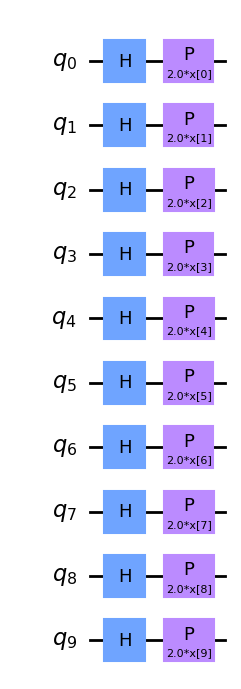

In [12]:
print(feature_map.decompose()) 
feature_map.decompose().draw(output="mpl", style="clifford", fold=20) 

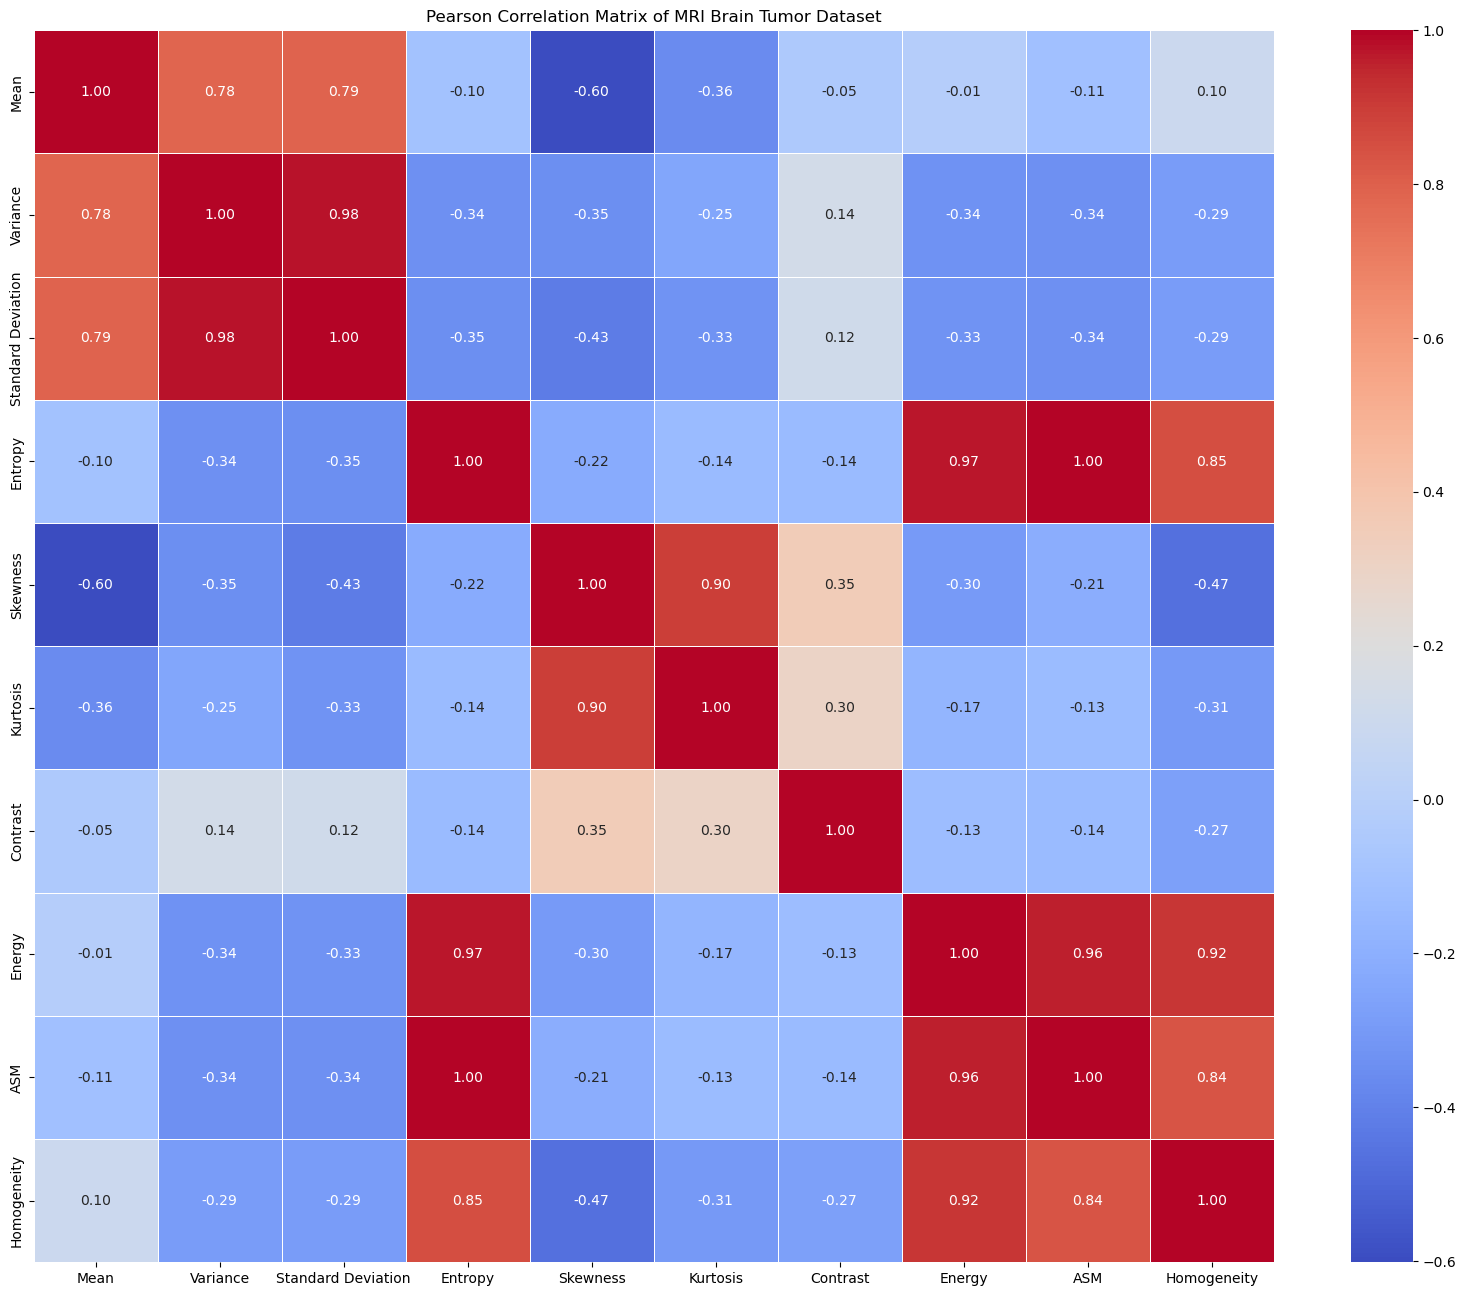

In [13]:
#Correlation matrix (Pearson Method) 

pearson_matrix = X_scaled_df.corr(method='pearson') 

#Heatmap Visualization 

plt.figure(figsize=(20, 16)) 
sns.heatmap(pearson_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5) 
plt.title('Pearson Correlation Matrix of MRI Brain Tumor Dataset') 
plt.show() 

 

In [14]:
# Classical baseline (keeping original parameters for fair comparison) 

print("\nTraining classical baseline...") 

classical_pegasos = SGDClassifier( 

    loss='hinge',  
    alpha=1/100,  # equivalent to C=100 
    max_iter=250,  
    learning_rate='constant',  
    eta0=0.01,  
    random_state=12345 

) 

 

classical_pegasos.fit(train_features, train_labels) 
classical_score = classical_pegasos.score(test_features, test_labels) 

print(f"Classical baseline score: {classical_score:.6f}") 


Training classical baseline...
Classical baseline score: 0.976096


In [15]:
# After your hyperparameter optimization loop completes 

# Use the best model to make predictions 

y_true = test_labels  # Your actual test labels 
y_pred = best_quantum_model.predict(test_features)  # Predictions from best model 

# Create confusion matrix 

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_true, y_pred) 
print("Confusion Matrix:") 
print(cm) 


# Extract values for your table 

tn, fp, fn, tp = cm.ravel() 
print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}") 

 
# Calculate all metrics 

accuracy = (tp + tn) / (tp + tn + fp + fn) 
precision = tp / (tp + fp) if (tp + fp) > 0 else 0 
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0 
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0 
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0 

 

print(f"Accuracy: {accuracy:.6f}") 
print(f"Precision: {precision:.6f}") 
print(f"Sensitivity: {sensitivity:.6f}") 
print(f"Specificity: {specificity:.6f}") 
print(f"F1-Score: {f1_score:.6f}") 

Confusion Matrix:
[[412   4]
 [  9 328]]
TP: 328, TN: 412, FP: 4, FN: 9
Accuracy: 0.982736
Precision: 0.987952
Sensitivity: 0.973294
Specificity: 0.990385
F1-Score: 0.980568


In [16]:
# Get predictions for classical confusion matrix 

y_true_classical = test_labels 
y_pred_classical = classical_pegasos.predict(test_features) 

# Create confusion matrix for classical model 

from sklearn.metrics import confusion_matrix 

cm_classical = confusion_matrix(y_true_classical, y_pred_classical) 
tn_c, fp_c, fn_c, tp_c = cm_classical.ravel() 

print(f"\nClassical Confusion Matrix Results:") 
print(f"TP: {tp_c}, TN: {tn_c}, FP: {fp_c}, FN: {fn_c}") 

 
# Calculate classical metrics 

accuracy_c = (tp_c + tn_c) / (tp_c + tn_c + fp_c + fn_c) 
precision_c = tp_c / (tp_c + fp_c) if (tp_c + fp_c) > 0 else 0 
sensitivity_c = tp_c / (tp_c + fn_c) if (tp_c + fn_c) > 0 else 0 
specificity_c = tn_c / (tn_c + fp_c) if (tn_c + fp_c) > 0 else 0 
f1_score_c = 2 * (precision_c * sensitivity_c) / (precision_c + sensitivity_c) if (precision_c + sensitivity_c) > 0 else 0 

 
print(f"Classical Metrics:") 
print(f"Accuracy: {accuracy_c:.6f}") 
print(f"Precision: {precision_c:.6f}") 
print(f"Sensitivity: {sensitivity_c:.6f}") 
print(f"Specificity: {specificity_c:.6f}") 
print(f"F1-Score: {f1_score_c:.6f}") 

 

# For your comparison table 

print(f"\nClassical LaTeX table row:") 
print(f"{tp_c} & {tn_c} & {fp_c} & {fn_c} & {accuracy_c:.6f} & {precision_c:.6f} & {sensitivity_c:.6f} & {specificity_c:.6f} & {f1_score_c:.6f}") 


Classical Confusion Matrix Results:
TP: 321, TN: 414, FP: 2, FN: 16
Classical Metrics:
Accuracy: 0.976096
Precision: 0.993808
Sensitivity: 0.952522
Specificity: 0.995192
F1-Score: 0.972727

Classical LaTeX table row:
321 & 414 & 2 & 16 & 0.976096 & 0.993808 & 0.952522 & 0.995192 & 0.972727
